## 들어가며

### 학습목표
<hr/>

- scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.
- scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.
- 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
- Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
- 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.

<p></p>

## 1-2. Iris의 세 가지 품종, 분류해 볼까요? <br/>(1) 붓꽃 분류 문제
<hr/>

<img src = "img/petal_sepal.png">

## iris란?

- 아이리스는 통계학자인 피셔(Fisher)가 소개한 데이터
- 붓꽃의 3가지 종(setosa, versicolor, virginica)에 대해 꽃받침(sepal)과 꽃잎(petal)의 길이를 정리한 데이터

### Q1. petal과 sepal의 의미?

= iris 저장된 데이터들 중의 하나이다.

- petal: 꽃잎을 뜻함
- sepal: 꽃받침을 뜻함

### Q2. scikit-learn이 예제로 제공하는 데이터셋 

<p style= "font-size:15px; font-weight:bold;">Toy datasets</p>

- Boston house prices dataset
- Iris plants dataset
- Diabetes dataset
- Optical recognition of handwritten digits dataset
- Linnerrud dataset
- Wine recognition dataset
- Breast cancer wisconsin (diagnostic) dataset

<p style= "font-size:15px; font-weight:bold;">Real world datasets</p>

- The Olivetti faces dataset
- The 20 newsgroups text dataset
- The Labeled Faces in the Wild face recognition dataset
- Forest covertypes
- RCV1 dataset
- Kddcup 99 dataset
- California Housing dataset

## 1-3. Iris의 세 가지 품종, 분류해 볼까요?<br/> (2) 데이터 준비, 그리고 자세히 살펴보기는 기본!
<hr/>

In [1]:
# iris 데이터셋 불러오기
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
# dir()을 실행하여 객체가 어떤 변수와 메서드를 가지고 있는지 확인하기
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
# keys()를 실행하여 iris에 담긴 정보의 종류 및 개수 확인하기
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# 변수에 모델의 데이터 저장
iris_data = iris.data

In [6]:
# shape()를 실행하여 데이터의 크기를 확인하기 = 4행 150열
print(iris_data.shape)

(150, 4)


In [7]:
# iris_data의 0번째 인덱스 값 확인하기
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

= 순서대로 `sepal length`, `sepal width`, `petal length`, `petal width`를 나타냄.

### Q3. 우리는 붓꽃의 꽃잎과 꽃받침 길이를 이용해 무엇을 맞추고 싶은 건가요?

- sepal length (꽃받침의 길이)
- sepal width (꽃받침의 너비)
- petal length (꽃받침의 길이)
- petal width (꽃받침의 너비)

위 4가지의 데이터를 통해 붓꽃의 3가지 종(setosa, versicolor, virginica) 중 어떤 종에 더 가까운지 판단하여 
붓꽃의 종류를 맞추는 것이다.

### 라벨(label)과 타겟(target)

- 머신러닝 모델이 출력해야하는 정답

In [8]:
# 타겟값 설정하기
iris_label = iris.target

In [9]:
# target값의 모양 확인하기
iris_label.shape

(150,)

In [10]:
# 붓꽃의 종이 3가지이므로 3종류의 데이터 값이 나옴
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# 3종류의 데이터 값 확인해보기
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

=  setosa(0), versicolor(1), virginica(2)를 뜻함

In [12]:
# DESCR을 사용하여 데이터셋의 설명 확인하기
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [13]:
# feature_names 사용하여 feature(데이터의 특성) 확인해보기
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# filename 사용하여 파일의 이름, 형태 확인해보기
iris.filename

'/home/aiffel-dj32/anaconda3/lib/python3.9/site-packages/sklearn/datasets/data/iris.csv'

## 1-4. 첫 번째 머신러닝 실습, 간단하고도 빠르게! <br/>(1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비
<hr/>

### pandas란?
파이썬에서 표 형태로 이루어진 2차원 배열 데이터를 다루는데에 가장 많이 쓰이는 도구이다.  
표 데이터를 활용하여 데이터 분석을 하기도 하고, 대형 데이터의 여러 통계량을 다루는 것에 최적화되어있다.

In [15]:
# pandas 불러오기 - as를 사용하여 별칭을 pd로 정함
import pandas as pd

In [16]:
# __version__ 사용하여 pandas의 버전 확인하기
print(pd.__version__)

1.3.4


In [17]:
# 데이터 프레임 만들기
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

In [18]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


`DataFrame` 을 만들면서 `data`에는 `iris_data`를 넣어주고,  
각 컬럼에는 `feature_names`로 이름을 붙여주었습니다.

In [19]:
# target 데이터 추가하기
iris_df['label'] = iris.target

In [20]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


###  정리하기

<p style= "font-size:15px; font-weight:bold;">feature</p>

- 머신러닝 모델에게 `입력`되는 데이터. 
- `문제지`로 비유하기도 한다.
- 변수 이름으로는 `X`를 많이 사용한다.

<p style= "font-size:15px; font-weight:bold;">label 또는 target</p>

- 머신러닝 모델이 `맞혀야 하는` 데이터. 
- `정답지`라고 비유하기도 한다. 
- 변수 이름으로는 `y`를 많이 사용한다.

### train_test_split()

- 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 주는 함수
- `random_state()`: 자체적으로 랜덤 시드를 정하여 항상 같은 랜덤결과를 도출할 수 있음.
- `test_size`: 테스트 세트의 비율을 0.2로 지정함 (훈련세트: 80%, 테스트 세트: 20%)

In [21]:
# train_test_split 불러오기
from sklearn.model_selection import train_test_split

In [22]:
# train_test_split사용하여 훈련 데이터와 테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 7)

In [23]:
# 테스트와 훈련 세트 크기 확인해보기
print('x_train 개수: ', len(x_train),', x_test 개수: ', len(x_test))

x_train 개수:  120 , x_test 개수:  30


In [24]:
# test_size가 잘 실행되었는지 확인해보기
x_train.shape, y_train.shape

((120, 4), (120,))

In [25]:
x_test.shape, y_test.shape

((30, 4), (30,))

In [26]:
# y값 확인해보기 - y는 target값을 의미한다.
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

무작위로 잘 섞여져있는 것을 확인할 수 있다.

## 1-5. 첫 번째 머신러닝 실습, 간단하고도 빠르게! <br/>(2) 첫 번째 머신러닝 모델 학습시키기
<hr/>

### 지도학습 VS 비지도학습

- `지도학습`은 지도받을 수 있는, 즉 `정답(target 데이터)이 있는 문제`에 대해 학습하는 것을 말하고,
- 반대로 `비지도 학습`은 `정답(target)이 없는 문제`를 학습하는 것을 말한다.

### Q5. 붓꽃 품종 문제는 지도학습인가, 비지도학습인가?

target(정답지)를  주고 모델을 훈련시킨 후  
 예측값이 정답이 맞는지 맞지 않는지를 확인하므로,  
지도학습이다.  

### 분류(Classification)와 회귀(Regression)

<p style= "font-size:15px; font-weight:bold;">분류(Classification)</p>

- 입력받은 데이터를 특정 카테고리 중 하나로 `분류`해내는 문제 
- 예측 결과가 연속성을 지니지 않으며 `이산값`을 가지고 있다
- 타겟값이 `범주형 변수`인 경우
- 종류에는 `이진분류`와 `다중분류`가 있다

<p style= "font-size:15px; font-weight:bold;">회귀(Regression)</p>



- 입력받은 데이터에 따라 특정 필드의 `수치`를 맞히는 문제
- 회귀는 예측 결과가 `연속성`을 지닌다
- `실수형 변수`를 통해 예측하여 예측 결과값이 연속성을 지니고 있는 경우


### Q6. 붓꽃 품종 문제는 분류 문제인가, 회귀 문제인가요?

붓꽃의 3가지 종(setosa, versicolor, virginica)에 대해    
꽃받침(sepal)과 꽃잎(petal)의 길이를 정리한 데이터를 학습하여   
붓꽃의 종류(특정 카테고리) 중 하나로 분류해내므로    

분류(Classification)이다.

### Q7. 분류 문제와 회귀 문제의 예는 무엇이 있을까요?

분류문제
: 와인의 당도, 색, 농도 등을 바탕으로 와인의 종류를 구별하기

회귀문제
: 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값 예측하기

### Q8. Decision Tree의 한국말과 이름이 붙은 이유를 설명하기

결정 트리 모델 또는 의사 결정 나무

의사결정나무는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 그 모양이 ‘나무’와 같다고 해서 의사결정나무라 불림


### Q9. Decision Tree의 단점이과 이를 극복하기 위해 등장한 모델은? 그리고 그 모델의 원리는?

결정경계(decision boundary)가 데이터 축에 수직이어서   
특정 데이터에만 잘 작동할 가능성이 높다.  
이를 극복하기 위해  RandomForest가 등장했다.  
여러개의 결정트리를 합쳐( = 숲) 하나로 묶어 놓은 원리이다.

In [27]:
# 결정 트리 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [28]:
# 변수에 모델을 저장 / 랜덤 시드 지정하기
decision_tree = DecisionTreeClassifier(random_state = 32)

In [29]:
decision_tree._estimator_type

'classifier'

In [30]:
# 모델 fit()으로 훈련시키기
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=32)

### fit() 메서드

- 모델을 훈련시킴

- 모델에 데이터를 전달하여 규칙을 학습하는 과정을 훈련이라 함

## 1-6. 첫 번째 머신러닝 실습, 간단하고도 빠르게!<br/>(3) 첫 번째 머신러닝 모델 평가하기
<hr/>

In [31]:
# 테스트 데이터로 예측해보기
y_pred = decision_tree.predict(x_test)

`predict`은 새로운 데이터의 정답을 예측함

In [32]:
# 모델이 예측한 값 출력해보기
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [33]:
# 실제 값과 비교해보기
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [34]:
# 정확도 평가 패키지 불러오기
from sklearn.metrics import accuracy_score

In [35]:
# 모델의 정확도 평가하기
accuracy = accuracy_score(y_test, y_pred)

In [36]:
accuracy

0.9

### 정확도 계산법

<img src="img/정확도.png" style= "float:left">

## 1-7. 첫 번째 머신러닝 실습, 간단하고도 빠르게!<br/>(4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!
<hr/>

### Decision Tree 모델의 학습, 예측 과정 

In [37]:
# 모듈 import 하기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [38]:
# 데이터 준비하기
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

In [39]:
# 훈련 데이터와 테스트 데이터 분리하기
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 7)

In [40]:
# 모델 학습 및 예측하기
decision_tree = DecisionTreeClassifier(random_state = 32)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



<p style= "font-size:16px;">여기서 모델을 바꿔보고 싶다면 (4) 모델 학습 및 예측 부분에서 모델만 바꿔주면 된다. <br/>모델이 바뀐다고 해도 위와 같이 진행되는 큰 흐름은 변하지 않으니 이 흐름을 잘 기억해두도록 하자.</p>

### 랜덤 포레스트(Random Forest)

- Decision Tree을 여러개 모아놓은 형태이다.
- Decision Tree 모델을 여러 개 합쳐놓음으로써 Decision Tree의 단점을 극복한 모델
- 이러한 기법을 `앙상블(Ensemble)`이라고 한다.

<img src = "img/Random Forest 03.gif">

### 랜덤 포레스트(Random Forest)의 과정

1. 건강의 위험도를 예측하기 위해서는 많은 요소를 고려 성별, 키, 몸무게, 지역, 운동량, 흡연유무, 음주 여부, 혈당, 근육량, 기초 대사량 등 수많은 요소가 필요

2. Feature가 30개라 했을 때 30개의 Feature를 기반으로 하나의 결정 트리를 만든다면 트리의 가지가 많아질 것이고, 이는 오버피팅의 결과를 야기

3. 30개의 Feature 중 랜덤으로 5개의 Feature만 선택해서 하나의 결정 트리 생성

4. 계속 반복하여 여러 개의 결정 트리 생성

5. 여러 결정 트리들이 내린 예측 값들 중 가장 많이 나온 값을 최종 예측값으로 지정 (앙상블)

6. 하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 것이 아니라 여러 개의 작은 결정 트리를 만드는 것

### 분류와 회귀

- **분류** : 샘플을 몇개의 클래스 중 하나로 분류하는 문제이다.
- **회귀** : 임의의 어떤 숫자를 예측하는 문제이다.

### 앙상블 (Ensemble method) 

- 의견을 통합하거나 여러가지 결과를 합치는 방식을 뜻한다.
- 정형 데이터를 다루는 데에 있어 가장 뛰어난 성과를 보인다.
- 대부분 결정 트리를 기반으로 만들어져 있다.

### Q10. Random Forest의 Random은 무엇이 랜덤이라는 것을 나타내나요?
Random Forest는 여러 개의 의사 결정 트리를 모아 놓은것으로,  
각각의 의사 결정 트리를 만들기 위해 쓰이는 특성들을 랜덤으로 선택한다.

In [42]:
# random forest 불러오기
from sklearn.ensemble import RandomForestClassifier

In [43]:
# 훈련세트, 테스트 세트 나누기
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 21)

In [44]:
# 변수에 모델을 저장 / 랜덤 시드 지정하기 
random_forest = RandomForestClassifier(random_state = 32)

In [45]:
# 모델 훈련시키기
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=32)

In [46]:
# 결과 출력하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.27      0.25      0.26        12
           2       0.25      0.43      0.32         7

    accuracy                           0.33        30
   macro avg       0.36      0.35      0.34        30
weighted avg       0.38      0.33      0.34        30



### 다른 scikit-learn 내장 분류 모델

### 1. Support Vector Machine (SVM)

`SVM`은 Support Vector와 Hyperplane(초평면)을 이용해서   
분류를 수행하게 되는 대표적인 `선형 분류 알고리즘`입니다.

<img src = "img/SVM.png">

2차원 공간에서 즉, 데이터에 2개의 클래스만 존재할 때

- **Decision Boundary(결정 경계)** : 두 개의 클래스를 구분해 주는 선
- **Support Vector** : Decision Boundary에 가까이 있는 데이터
- **Margin** : Decision Boundary와 Support Vector 사이의 거리

<img src = "img/SVM2.png">

Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다. (Margin 최대화 -> robustness 최대화)

<p style= "font-size:15px; font-weight:bold;">Kernel Trick</p>

- 저차원의 공간을 고차원의 공간으로 매핑해주는 작업.
- 데이터의 분포가 선형으로 분리가 되지 않을 경우(`Linearly separable`)<br/>데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.

<p style= "font-size:15px; font-weight:bold;">cost</p>

- Decision Boundary와 Margin의 간격을 결정함
- cost가 높으면 Margin이 좁아지고 train error가 작아진다.<br/>(그러나 새로운 데이터에서는 분류를 잘 할 수 있다.)
- cost가 낮으면 Margin이 넓어지고, train error는 커진다.

<p style= "font-size:15px; font-weight:bold;">γ</p>

- 한 train data당 영향을 미치는 범위를 결정함


- γ가 커질경우
    - 데이터가 영향을 미치는 범위가 줄어든다. 
    -  Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다.
    -  Decision Boundary는 구불구불하게 그어진다. `오버피팅을 초래한다.`  
    
    

- γ가 작아질경우
    - 데이터가 영향을 미치는 범위가 커진다.
    - Decision Boundary가 `직선`에 가까워진다.

<img src = "img/SVM3.png">

## 직접 SVM 모델 사용해보기

In [47]:
# SVM 불러오기
from sklearn import svm

In [48]:
# 모델을 변수에 할당
svm_model = svm.SVC()

In [49]:
# 모델의 종류 확인
print(svm_model._estimator_type)

classifier


### Q11. SVM 모델을 학습시키고, 결과를 확인해 보세요.

In [50]:
# 모델 학습 및 예측하기
svm_model.fit(x_train, y_train)

SVC()

In [51]:
# 테스트 데이터로 예측해보기
y_pred = svm_model.predict(x_test)

In [52]:
# 평가 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



### 2. Stochastic Gradient Descent Classifier (SGDClassifier)

- 배치 크기가 1인 `경사 하강법 알고리즘`이다.
- 데이터 세트에서 무작위로 균일하게 선택한 하나의 예에 의존하여 각 단계의 예측 경사를 계산합니다.
- `확률적(Stochastic)` = 각 배치를 포함하는 하나의 예가 무작위로 선택된다는 것을 의미

<small style = "font-weight:bold;">&lt;최소값을 찾는 과정&gt;<small/>

<img src = "img/SGDClassifier.png">

#### 단점
-  반복이 충분하면 SGD가 효과는 있지만 노이즈가 매우 심해다.
-  최저점을 찾지 못할 수 있다.

#### 단점의 극복
- 단점을 극복하기 위해 미니 배치 확률적 경사하강법(미니 배치 SGD)이 등장함.
- 미니 배치 확률적 경사하강법(미니 배치 SGD)는 전체 배치 반복과 SGD 의 절충안입니다.

#### 배치란 무엇인가?

- 배치는 일괄적으로 처리되는 집단을 의미
- 한 번에 여러 개의 데이터를 묶어서 입력하는 방식이다.
- GPU의 병렬 연산 기능을 최대한 효율적으로 사용하기 위해 쓰는 방식이다.

#### 경사하강법(Gradient Descent)에서의 배치란?
- 단일 반복에서 기울기를 계산하는 데 사용하는 예(data)의 총 개수
- 전체 데이터 셋라고 가정합니다.

배치 사이즈가 <b style="color: blue;">너무 큰 경우</b>
- 한번에 처리해야 할 데이터의 양이 많아진다
- 때문에, 학습 속도가 느려지고, 메모리 부족 문제가 발생할 위험이 있음.

배치 사이즈가 <b style="color: blue;">너무 작은 경우</b><br/>
- 적은 데이터를 대상으로 가중치를 업데이트하고 
- 이 업데이트가 자구 발생하므로 훈련이 불안정해짐.

### 직접 SGD Classifier 모델 사용해보기

In [53]:
# 모델 불러오기
from sklearn.linear_model import SGDClassifier

In [54]:
# 모델을 변수에 할당
sgd_model = SGDClassifier()

In [55]:
print(sgd_model._estimator_type)

classifier


### Q12. SGD Classifier 모델을 학습시키고, 결과를 확인해 보세요.

In [56]:
sgd_model.fit(x_train, y_train)

SGDClassifier()

In [57]:
y_pred = sgd_model.predict(x_test)

In [58]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### 로지스틱 회귀 (Logistic Regression)

- 가장 널리 알려진 선형 분류 알고리즘. 
-  소프트맥스(softmas) 함수를 사용한 `다중 클래스 분류 알고리즘`
- 소프트맥스 회귀(Softmax Regression)라고도 함
-  실제로는 `분류`를 수행

<img src = "img/Logistic Regression.png">

## softmax
- 도출된 값들을 0과 1사이의 값으로 정규화 시킴

<img src = "img/softmax.png">

<img src = "img/softmax2.png" style ="width:100%;">

### Logistic Regression 모델 사용하기

In [59]:
# LogisticRegression 불러오기
from sklearn.linear_model import LogisticRegression

In [60]:
# 모델을 변수에 할당
logistic_model = LogisticRegression()

In [61]:
print(logistic_model._estimator_type)

classifier


### Q13. Logistic Regression 모델을 학습시고, 결과를 확인해 보세요.

In [62]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [63]:
y_pred = logistic_model.predict(x_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## 1-8. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 <br/>(1) 정확도에는 함정이 있다
<hr/>

### 정확도에는 함정이 있다

In [65]:
# 손글씨 데이터 셋 불러오기
from sklearn.datasets import load_digits

In [66]:
digits = load_digits()

In [67]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [68]:
# 데이터 확인하기
digits_data = digits.data
digits_data.shape

(1797, 64)

In [69]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

= digits_data[0]의 array안의 각 숫자는 이미지의 `픽셀값`을 의미함.

In [70]:
# maplotlib 불러오기
import matplotlib.pyplot as plt

In [74]:
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

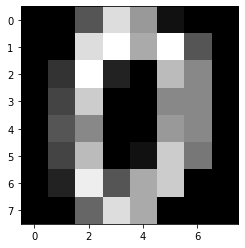

In [101]:
plt.imshow(digits.data[0].reshape(8, 8), cmap = 'gray')
# plt.axis('off')
plt.show()

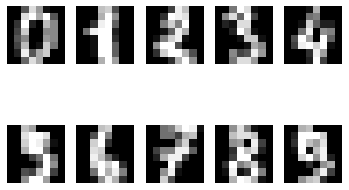

In [75]:
# 여러개의 이미지 한번에 확인하기
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap = 'gray')
    plt.axis('off')
plt.show()

In [76]:
digits_label = digits.target

In [77]:
print(digits_label.shape)

(1797,)


In [79]:
digits_label[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

###  해당 이미지 데이터가 3인지 아닌지를 맞히는 모델 생성해보기
- target인 digits_label을 아래와 같이 살짝 변형하여 분류가 아닌 `예측`을 하는 모델을 생성하자

In [81]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

= 숫자가 3이면 그래도 3을, 아니면 0을 출력하는 new_label을 생성함

### 직접 모델 학습시키기

In [1]:
# import
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
# 모델을 변수에 할당
decision_tree = DecisionTreeClassifier(random_state = 15)

In [3]:
digits = load_digits()

In [4]:
# 키 확인하기
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits_data = digits.data

In [6]:
digits_data.shape

(1797, 64)

In [7]:
digits_label = digits.target

In [8]:
digits_label.shape

(1797,)

In [9]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [14]:
# 훈련 / 테스트 세트 나누기
x_train, x_test, y_train, y_test = train_test_split(digits_data, new_label, test_size = 0.2, random_state = 15)

In [17]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=15)

In [18]:
y_pred = decision_tree.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [20]:
accuracy = accuracy_score(y_test, y_pred)

In [21]:
print(accuracy)

0.9388888888888889


### Q14. digits_data와 new_label로 Decision Tree 모델을 학습시키고, 정확도를 확인하기

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

### 정확도의 함정

정답 데이터인 label은 0이 매우 많고 3은 적은 불균형 데이터가 되었습니다. 9개의 숫자들은 label이 모두 0이 되었고, 3만 3으로 남아있었으니 대략 90%의 label이 모두 0이라는 이야기가 되죠.

바로 모델이 전혀 학습하지 않고 **정답을 모두 0으로만 선택해도 정확도가 90%가량이 나오게 된다는 것**입니다. 실제로 확인해 보죠.

In [22]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)

In [23]:
accuracy

0.925

<p style="color: blue;">모델을 사용하지 않고 target 리스트의 값을 0으로만 설정했는데, 정확도가 92.5%가 나옴</p>

이러한 문제는 **불균형한 데이터, unbalanced 데이터** 에서 자주 발생할 수 있습니다.

## 1-9. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기<br/>(2) 정답과 오답에도 종류가 있다!
<hr/>

### 오차 행렬(confusion matrix)

- 정답과 오답을 구분하여 표현하는 방법을 뜻한다.

### Q15. 오차 행렬에서는 예측 결과를 네 가지로 구분합니다. 각각은 무엇인가요?

1. True Positive (TP)
2. False Negative(FN) 
3. False positive(FP)
4. True Negative(TN)

In [ ]:
1. Sensitivity( True Positive Rate or Recall)
2. Specificity ( True Negative Rate)
3. Precision
4. Accuracy
5. Negative Predictive Value

### 오차 행렬(confusion matrix)이란?

다음 그림에서 각 `행`은 `실제 클래스(Actual Class)`를 나타냅니다.  
코로나의 예시를 계속 생각해 볼 때, Actual Class가 Positive라면 환자는 실제 코로나바이러스에 감염된 것이죠.  
반대로 Actual Class가 Negative라면 환자는 건강합니다.

반면 각 `열`은 `예측된 클래스(Predicted Class)`입니다.   
Predicted Class가 Positive라면 진단 결과가 양성,    
Negative라면 진단 결과가 음성인 것을 말합니다.

####  칸에 나타난 TP, FN, FP, TN의 뜻

- TP(True Positive) : 실제 환자에게 양성판정 (참 양성)
- FN(False Negative) : 실제 환자에게 음성판정 (거짓 음성)
- FP(False Positive) : 건강한 사람에게 양성판정 (거짓 양성)
- TN(True Negative) : 건강한 사람에게 음성판정 (참 음성)

<img src = "img/confusion matrix.jpg">

P, FN, FP, TN의 수치로 계산되는 성능 지표 중 대표적으로 쓰이는 것은 
- 정밀도(Precision)
- 재현율(Recall, Sensitivity)
- F1 스코어(f1 score) 입니다.

Recal은 위 그림에서 Sensitivity라고 표시된 지표와 같습니다.

#### Precision과 Recall, F1 score, 정확도(Accuracy)의 수식

<img src = "img/수식.png">

`Precision`과 `Recall`의 분자는 둘 다 `TP`입니다. TP는 맞게 판단한 양성이므로, 이 값은 높을수록 좋습니다. <br/>
하지만 분모에는 각각 FP와 FN가 있습니다. 이 값들은 잘못 판단된 것들이므로 `낮을수록 좋습니다`.

<p style="color: blue;">즉, TP는 높고 FP또는 FN이 낮을수록 좋은 예측이므로, Precision과 Recall 값이 클수록 좋습니다.</p>

#### Precision과 Recall의 차이점

- `Precision`은 분모에 있는 FP가 낮을수록 커집니다. <br/>Precision이 높아지려면 False Positive, 즉 음성인데 양성으로 판단하는 경우가 적어야 합니다.

- `Recall`은 분모에 있는 FN이 낮을수록 커집니다.<br/> Recall이 높아지려면 False Negative, 즉 양성인데 음성으로 판단하는 경우가 적어야 합니다.

#### F1 score란?
- Recall과 Precision의 조화평균

#### Accuracy란?
- Accuracy는 앞서 설명했듯 전체 데이터 중 올바르게 판단한 데이터 개수의 비율이다.

### Q17. 전체 메일함에서 스팸 메일을 거르는 모델에게는 Precision이 더 중요할까요, Recall이 더 중요할까요? (스팸 메일을 positive, 정상 메일을 negative로 생각합니다)

Precision이 높아지려면 False Positive, 즉 음성인데 양성으로 판단하는 경우가 적어야 합니다.<br/>
= 정상메일인데 스팸메일로 판단하는 경우가 적어야 함<br/><br/>

Recall이 높아지려면 False Negative, 즉 양성인데 음성으로 판단하는 경우가 적어야 합니다.<br/>
= 스팸메일인데 정상 메일로 판단하는 경우가 적어야함<br/><br/>

따라서 스팸메일을 정상 메일로 판단하지 않는 것보다, 정상 메일을 스팸 메일로 판단하지 않는 것이 더 중요하므로 Precision이 더 중요하다. 

### Q18. 암 환자를 진단하는 모델에게는 Precision, Recall 중 무엇이 더 중요한가요?

Precision이 높아지려면 False Positive, 즉 음성인데 양성으로 판단하는 경우가 적어야 합니다.<br/>
= 정상인데  암 환자로 판단하는 경우가 적어야 함<br/><br/>

Recall이 높아지려면 False Negative, 즉 양성인데 음성으로 판단하는 경우가 적어야 합니다.<br/>
= 암 환자인데  정상으로 판단하는 경우가 적어야함<br/><br/>

따라서, 정상인데 암 환자로 판단하지 않는 것보다 암환자인데 정상으로 판단하지 않는 경우가 더 중요하므로 Recall이 더 중요하다.

### 오차 행렬(confusion matrix) 확인하기

In [1]:
# confusion_matrix  import
from sklearn.metrics import confusion_matrix

In [33]:
# 모델이 예측한 손글씨 결과 확인
confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

In [34]:
#모든 숫자를 0으로 예측한 fake_pred의 결과 확인
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

모든 데이터를 0, 즉 Positive로 예측했고 <br/>Negative로 예측한 것은 없기 때문에 FN과 TN은 둘 다 0입니다.

### 모델이 예측했던 손글씨 결과의 Precision, Recall, F1 score 확인해보기

- `sklearn.metrics`의 `classification_report`를 활용하면 각 지표를 한 번에 확인할 수 있습니다.

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



0은 개수가 333개로 많기 때문에 precision과 recall에서 모두 0.97, 0.96으로 어렵지 않게 높은 점수를 받았습니다. <br/>반면 3은 27개뿐이기 때문에 모두 맞추기가 어려웠나 봅니다.<br/> precision과 recall은 각각 0.58, 0.67이 나왔군요.

### fake_pred 결과의 Precision, Recall, F1 score 확인해보기

In [38]:
print(classification_report(y_test, fake_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



0에 대한 precision과 recall은 0.93, 1로 매우 높지만 3에 대한 precision과 recall은 둘 다 0입니다. <br/>
0은 잘 잡아내지만, 3은 단 하나도 맞추지 못했다는 뜻이니까요.

In [40]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

y_pred와 fake_pred 모두 0.94, 0.925로 큰 차이가 없지만 이제는 알 수 있습니다. <br/>모델의 성능은 정확도만으로 평가하면 안 된다는 것을요!

 label이 불균형하게 분포되어있는 데이터를 다룰 때는 더 조심해야 합니다

## 1-10. 데이터가 달라도 문제 없어요!
<hr/>

### Q19. load_wine 데이터는 총 몇 개로 이루어져 있나요?<br/> feature와 label은 각각 무엇을 나타내나요?

 load_wine 데이터는 178개의 열과 13개의 행으로 이루어진 데이터이다.

feature(특성)은 와인의 종류를 구분할 수 있는 특성을 의미하며 총 13가지가 있다.<br/>
alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, 
flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline

label은 와인의 종류를 뜻한다. 
총 3가지의 카테고리가 있다(0, 1, 2)


### Q20. load_breast_cancer 데이터는 총 몇 개로 이루어져 있나요? feature와 label은 각각 무엇을 나타내나요

load_breast_cancere 데이터는 569개의 열과 30개의 행으로 이루어진 데이터이다.

feature(특성)은 유방암에 대한 정보로 총 30가지가 있다.

label은 악성과 양성 2가지이다.